<a href="https://colab.research.google.com/github/qlin1996/NYC_Property_Sales/blob/master/NYC_Property_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Cleaning

### Import Libraries, Read Data, and Set Style

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import io
nyc_properties_sales = pd.read_csv(io.BytesIO(uploaded['NYC_Citywide_Annualized_Calendar_Sales_Update.csv']))

sns.set(context= 'notebook', style='ticks', palette= 'GnBu_d', font='sans-serifs', font_scale=1.2, color_codes=True, rc={'lines.linewidth': 1.75, 'figure.figsize': (9, 6)})

### Clean Data

In [0]:
#renaming columns
nyc_properties_sales.rename(columns={'BUILDING CLASS CATEGORY': 'BUILDING CLASS', 'BLOCK':'tax block', 'LOT':'tax lot', 'BIN':'Building Identification Number', 'BBL':'Borough, Block, and Lot', 'NTA':'Neighborhood Tabulation Area'}, inplace=True)

# make column names all uppercase
nyc_properties_sales.columns = [x.upper() for x in nyc_properties_sales.columns]

# convert the values (1-5) in the "BOROUGH" column to borough names
nyc_properties_sales['BOROUGH'].replace({1:'MANHATTAN', 2:'BRONX', 3: 'BROOKLYN', 4: 'QUEENS', 5:'STATEN ISLAND'}, inplace=True)

# make values in 'NEIGHBORHOOD TABULATION AREA' all uppercase
nyc_properties_sales['NEIGHBORHOOD TABULATION AREA'] = nyc_properties_sales['NEIGHBORHOOD TABULATION AREA'].map(lambda x:x.upper(), na_action='ignore')

### Data Dictionary

**BOROUGH**\
**NEIGHBORHOOD**: DOF assessors determine the neighborhood name in the course of valuing properties\
**BUILDING CLASS**: Identifies properties broad usage (e.g. One Family Home)\
**TAX CLASS AS OF FINAL ROLL**: Present Tax Class. Every property in the city is assigned to one of four tax classes based on the use of the property. Classes 1: Residential property of up to three units, vacant land that is zoned for residential use, and most condominiums that are not more than three stories. Class 2: All other property that is primarily residential, such as cooperatives and condominiums. Class 3: Property with equipment owned by a gas, telephone or electric company. Class 4: All other properties not included in class 1,2, and 3, such as
offices, factories, warehouses, garage buildings, etc. \
**TAX BLOCK**: A sub-division of the borough on which real properties are located\
**TAX LOT**: A subdivision of a tax Block and represents the property unique location\
**EASE-MENT**: An easement is a right, such as a right of way, which allows an entity to make limited use of another's real property. For example: MTA railroad tracks that run across a portion of another
property. \
**BUILDING CLASS AS OF FINAL ROLL**: The building classification used to describe a property's constructive use. \
**ADDRESS**: The street address of the property as listed on the Sales File. Coop sales include the apartment in the address field.\
**APARTMENT NUMBER**\
**ZIP CODE**\
**RESIDENTIAL UNITS**: The number of residential units at the listed property\
**COMMERCIAL UNITS**: The number of commercial units at the listed property\
**TOTAL UNITS**: The total number of units at the listed property.\
**LAND SQUARE FEET**: The land area of the property listed in square feet. \
**GROSS SQUARE FEET**: The total area of all the floors of a building as measured from the exterior surfaces of the
outside walls of the building, including the land area and space within any building or structure
on the property.\
**YEAR BUILT**: Year the structure on the property was built. \
**TAX CLASS AT TIME OF SALE** \
**BUILDING CLASS AT TIME OF SALE**\
**SALE PRICE**: Price paid for the property. A $0 sale indicates that there was a transfer of ownership without a cash consideration.\
**SALE DATE**\
**LATITUDE**\
**LONGITUDE**\
**COMMUNITY BOARD**: New York City Community District where the building is located\
**COUNCIL DISTRICT**: New York City Council District where the building is located\
**CENSUS TRACT**: U.S. Census Tract where the building is located\
**BUILDING IDENTIFICATION NUMBER**: A unique identifier for each building in the City\
**BOROUGH, BLOCK, AND LOT**: A unique identifier for each tax lot in the City\
**NEIGHBORHOOD TABULATION AREA**: New York City Neighborhood area where the building is located  

# Data Analysis

In [121]:
nyc_properties_sales.head(1)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS,TAX CLASS AS OF FINAL ROLL,TAX BLOCK,TAX LOT,EASE-MENT,BUILDING CLASS AS OF FINAL ROLL,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,LATITUDE,LONGITUDE,COMMUNITY BOARD,COUNCIL DISTRICT,CENSUS TRACT,BUILDING IDENTIFICATION NUMBER,"BOROUGH, BLOCK, AND LOT",NEIGHBORHOOD TABULATION AREA
0,MANHATTAN,FINANCIAL,14 RENTALS - 4-10 UNIT,2A,7,38,NaN,S9,60 PEARL STREET,NaN,10004.0,3.0,2.0,5.0,"1,491","7,485",1900.0,2,S9,4027000,01/01/2016,40.703553,-74.011152,101.0,1.0,9.0,1000014.0,1.000070e+09,BATTERY PARK CITY-LOWER MANHATTAN


In [128]:
# Top 5 Building Classes
top_building_classes_count = nyc_properties_sales['BUILDING CLASS'].value_counts()
top_building_classes = top_building_classes_count.head().reset_index()
top_building_classes.rename(columns={'index':'BUILDING CLASS', 'BUILDING CLASS':'NUMBER OF BUILDINGS'}, inplace=True)
top_building_classes

,BUILDING CLASS,NUMBER OF BUILDINGS
0,01 ONE FAMILY DWELLINGS,57674
1,02 TWO FAMILY DWELLINGS,49164
2,10 COOPS - ELEVATOR APARTMENTS,38905
3,13 CONDOS - ELEVATOR APARTMENTS,36966
4,01 ONE FAMILY DWELLINGS,18618


In [129]:
# Property Sales by Borough and Top 5 Building Class
sales_by_borough_count = nyc_properties_sales.groupby('BOROUGH')['SALE DATE'].count()
sales_by_borough = sales_by_borough_count.reset_index()
sales_by_borough

,BOROUGH,SALE DATE
0,BRONX,30919
1,BROOKLYN,96958
2,MANHATTAN,74301
3,QUEENS,107707
4,STATEN ISLAND,35174


# Data Visualizations

### Property Sales by Borough of Top 5 Building Classes

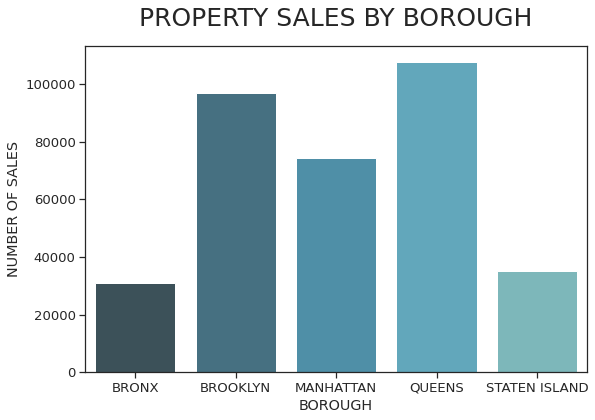

In [130]:
sns.barplot(x='BOROUGH', y= 'SALE DATE', data=sales_by_borough)
plt.ylabel('NUMBER OF SALES')
plt.title('PROPERTY SALES BY BOROUGH', fontsize=25, pad=20)
plt.show()